<a href="https://colab.research.google.com/github/anikaemo/Artificial_Lab/blob/main/cardiovd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install --upgrade pip

In [9]:
!pip install imbalanced-learn

In [10]:
pip install tensorflow

In [11]:
pip install scikeras

In [11]:
pip install xgboost

In [12]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [13]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv('/content/cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
df = df.drop(['id'], axis=1)
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
df.tail(5)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,20540,1,170,72.0,120,80,2,1,0,0,1,0


EDA

In [17]:
print(df.dtypes.value_counts())

int64      11
float64     1
Name: count, dtype: int64


In [18]:
df.duplicated().sum()

np.int64(24)

EDA_END

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


In [21]:
df.value_counts('cardio')

,count
cardio,
0,35021
1,34979


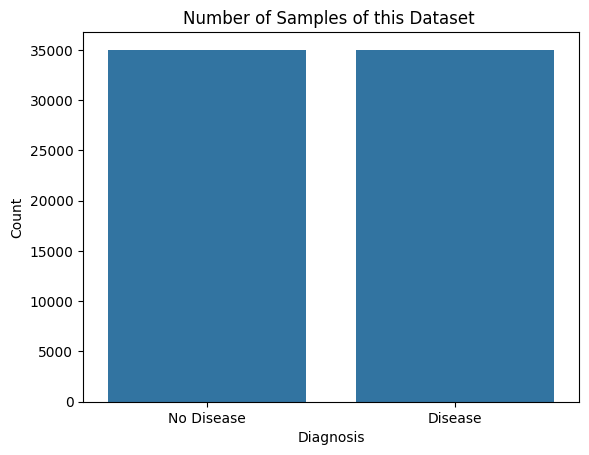

In [22]:
import seaborn as sns
sns.countplot(x='cardio', data=df)
plt.title('Number of Samples of this Dataset ')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.savefig('Number_of_samples_of_this_Dataset.pdf', bbox_inches='tight')
plt.show()

In [23]:
x = df.drop(columns=['cardio'])


In [24]:
df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [26]:
df_encoded = pd.get_dummies(df,columns=['age', 'gender', 'height', 'weight','ap_hi', 'ap_lo', 'cholesterol', 'gluc','smoke', 'alco', 'active', 'cardio'],drop_first=True
)

In [27]:
# Convert 'bool' columns to int (True -> 1, False -> 0)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Convert 'object' columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = df[col].astype(str)  # Ensure all values are strings
    df[col] = label_encoder.fit_transform(df[col])

# Check the result
print(df.head())
print(df.dtypes)

     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [28]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [29]:
df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [30]:
num_cols = df.shape[1]

print("Number of columns:", num_cols)

Number of columns: 12


In [31]:
num_cols = len(df.columns)  # ❌ This gives an integer

In [32]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

age
Skew : -0.31


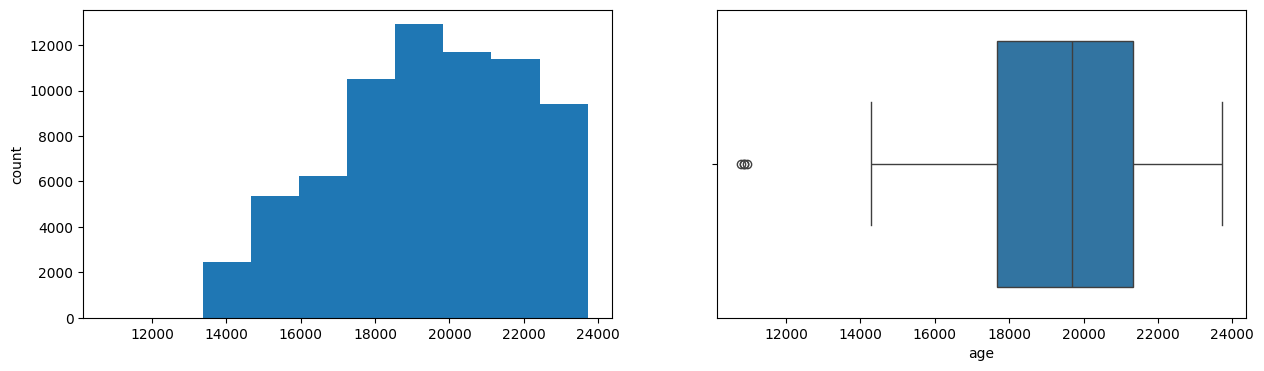

gender
Skew : 0.63


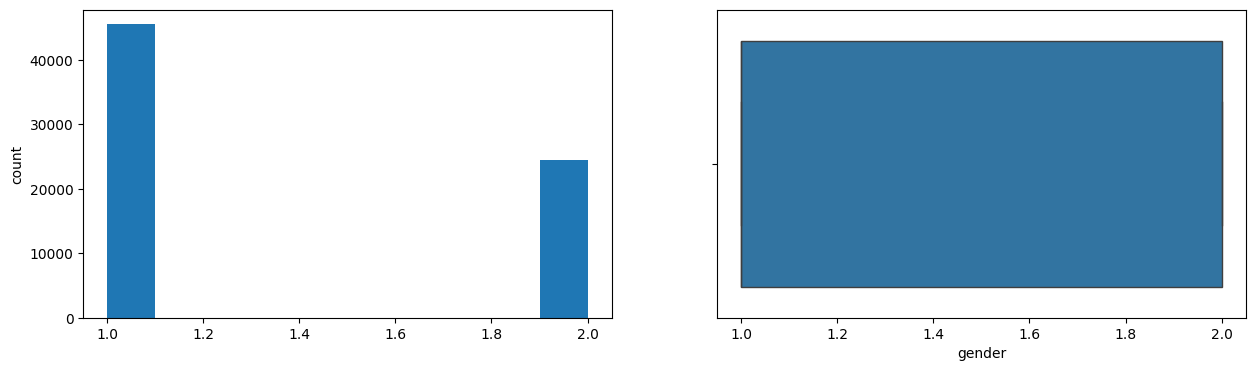

height
Skew : -0.64


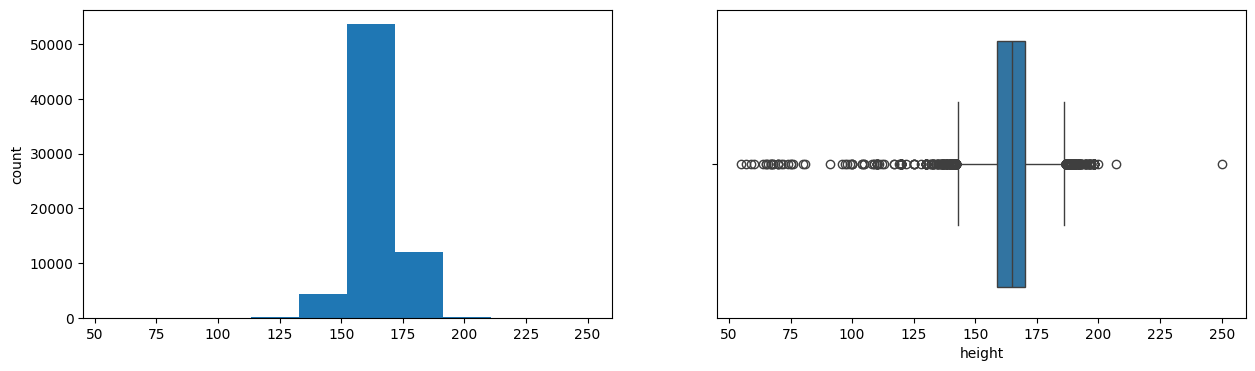

weight
Skew : 1.01


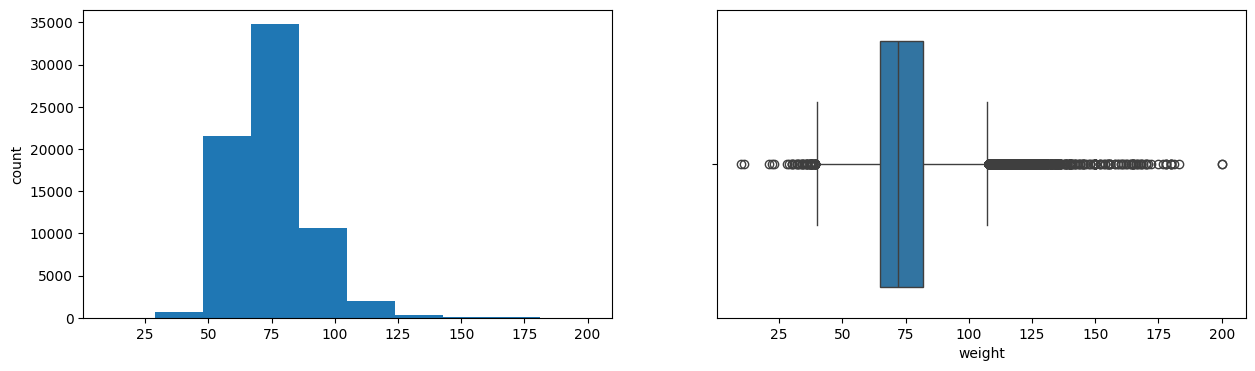

ap_hi
Skew : 85.3


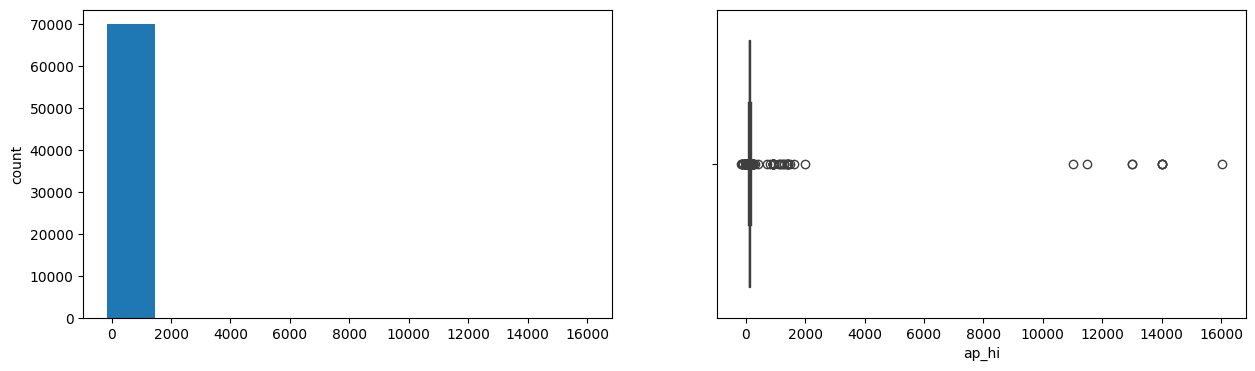

ap_lo
Skew : 32.11


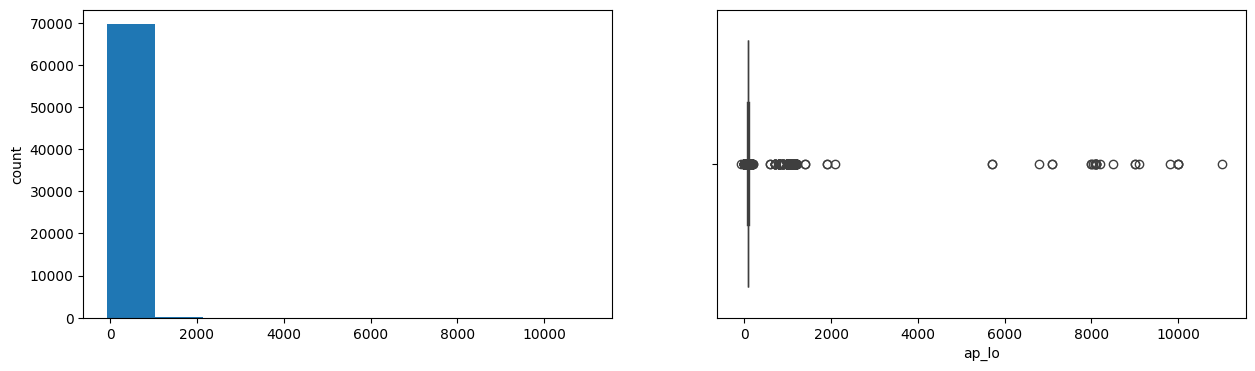

cholesterol
Skew : 1.59


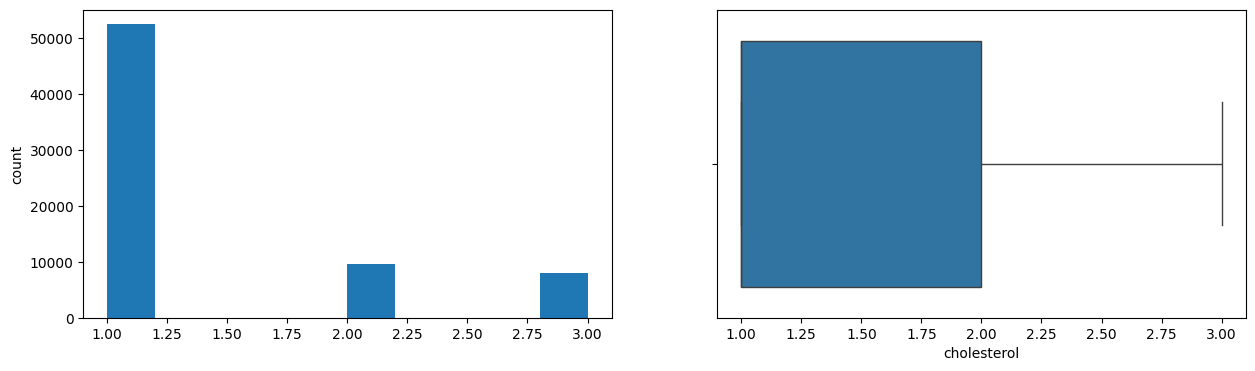

gluc
Skew : 2.4


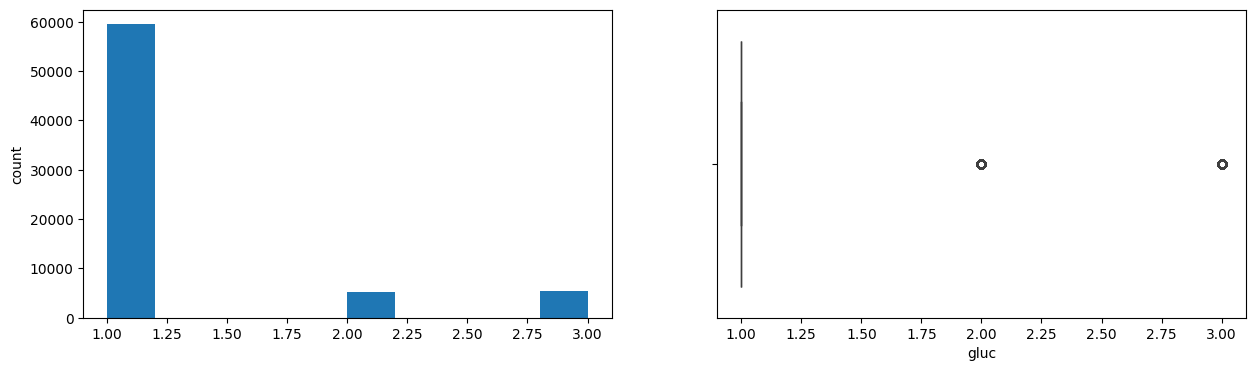

smoke
Skew : 2.91


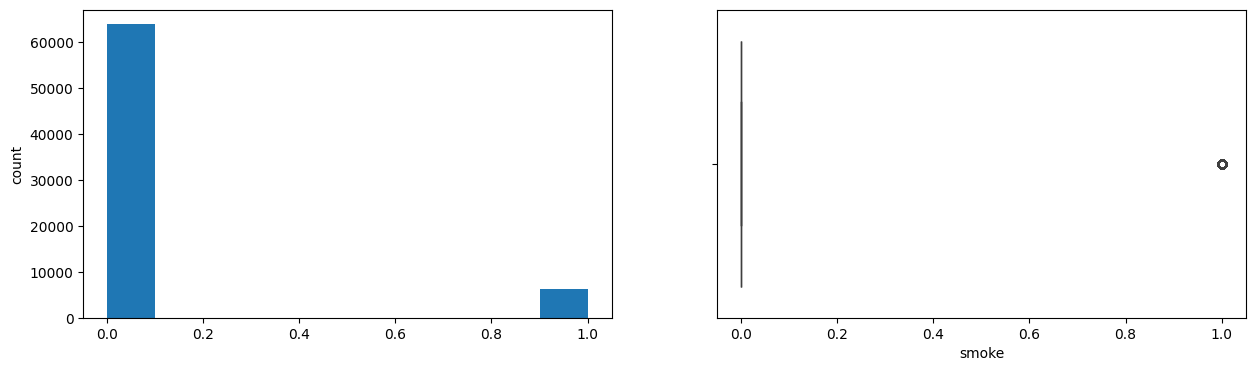

alco
Skew : 3.96


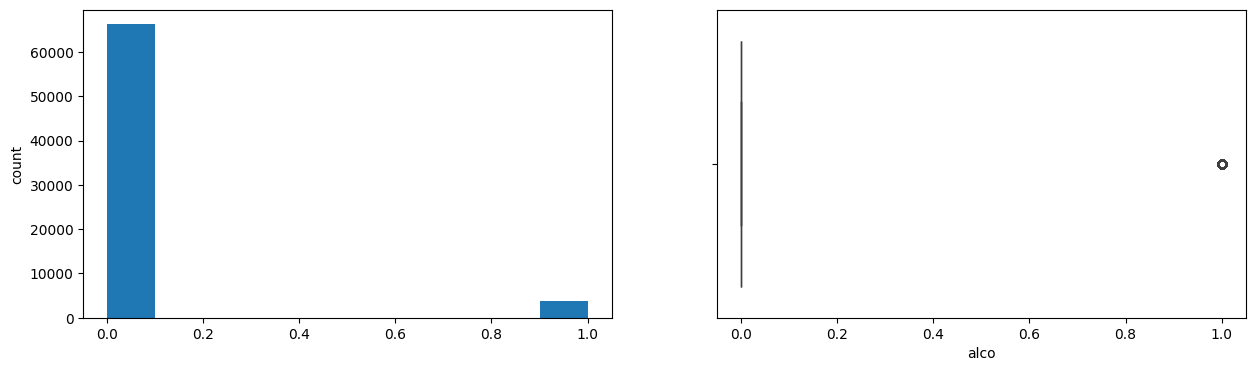

active
Skew : -1.53


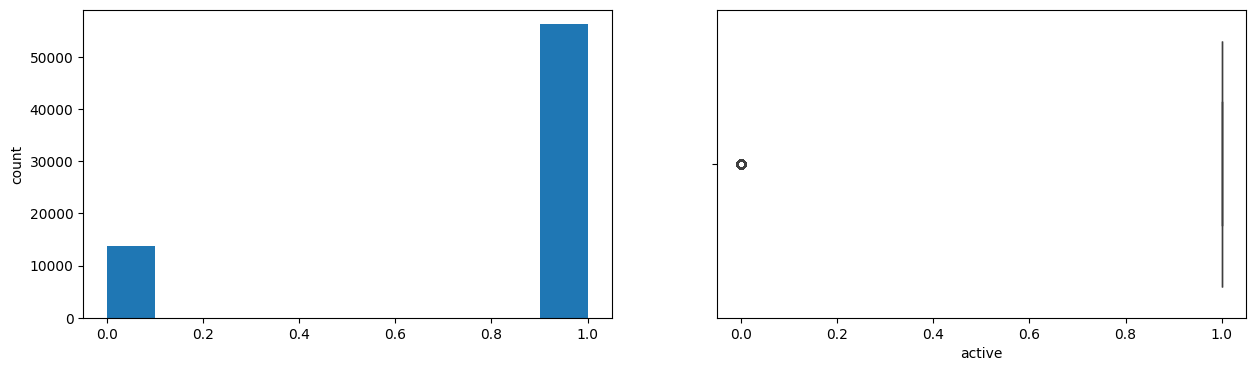

cardio
Skew : 0.0


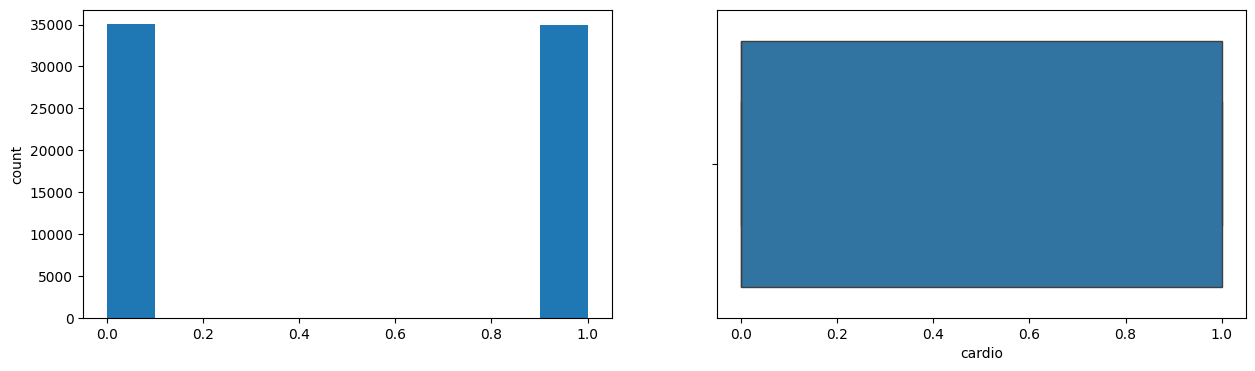

In [33]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Model training section

In [34]:
x = df.drop(columns=['cardio'])
y = df['cardio']

In [35]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.713
Precision: 0.7183488914819136
Recall: 0.7023673702224758
F1 Score: 0.710268243438131


Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the metrics
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Accuracy: 0.6287142857142857
Precision: 0.6275668073136428
Recall: 0.6363377067883628
F1 Score: 0.6319218241042345


KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the metrics
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

Accuracy: 0.6822857142857143
Precision: 0.6890855457227139
Recall: 0.6662863662293211
F1 Score: 0.6774941995359629


Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data
from sklearn.model_selection import train_test_split
X = df.drop(columns=['cardio'])
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set class counts:")
print(y_train.value_counts())

print("\nTest set class counts:")
print(y_test.value_counts())

# 1. Train a model (Logistic Regression here)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 2. Predict on test data
y_pred = model.predict(X_test)

# 3. Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Pipeline: scale data + logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

print("\nModel Performance:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Training set class counts:
cardio
0    28017
1    27983
Name: count, dtype: int64

Test set class counts:
cardio
0    7004
1    6996
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Performance:
Accuracy : 0.7042857142857143
Precision: 0.7204384069157147
Recall   : 0.667095483133219
F1 Score : 0.6927415763693039


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Reload original data to ensure 2D input for StandardScaler
X = df.drop(columns=['cardio'])
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split( X, y,  test_size=0.2, random_state=42, stratify=y)


# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Prediction
y_pred_lr = lr_model.predict(X_test_scaled)

Adaboost

In [44]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

# Print the metrics
print(f"Accuracy: {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"F1 Score: {f1_ada}")

Accuracy: 0.7222857142857143
Precision: 0.7638370118845501
Recall: 0.6430817610062893
F1 Score: 0.6982772000620828


Naive Bais

In [46]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb= f1_score(y_test, y_pred_nb)

# Print the metrics
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

Accuracy: 0.5890714285714286
Precision: 0.713500515286843
Recall: 0.2968839336763865
F1 Score: 0.419299485212476


SVM

In [48]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_svm= accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm= f1_score(y_test, y_pred_svm)

# Print the metrics
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

Accuracy: 0.6462142857142857
Precision: 0.6574687837212887
Recall: 0.6096340766152087
F1 Score: 0.6326485203589706


XGBoost

In [50]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test, y_pred_xgb)

# Print the metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

Accuracy: 0.7318571428571429
Precision: 0.7505409582689335
Recall: 0.6941109205260149
F1 Score: 0.7212238229615328


ANN

In [52]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_predictions = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5016 - loss: 123.9066 - val_accuracy: 0.4998 - val_loss: 1.5240
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5004 - loss: 4.7980 - val_accuracy: 0.5102 - val_loss: 0.7374
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5061 - loss: 1.2931 - val_accuracy: 0.5179 - val_loss: 0.7093
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5293 - loss: 0.7932 - val_accuracy: 0.5182 - val_loss: 0.6931
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5119 - loss: 0.7230 - val_accuracy: 0.4998 - val_loss: 0.6952
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4952 - loss: 0.7027 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4960 - loss: 0.6984 - val_accuracy: 0.4998 - val_loss: 0.6941
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4983 - loss: 0.7092 

LSTM

In [53]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split

if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(150, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_lstm.predict(X_test)
y_pred_lstm = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4952 - loss: 5.8360 - val_accuracy: 0.5003 - val_loss: 0.6941
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5047 - loss: 0.7038 - val_accuracy: 0.5003 - val_loss: 0.6933
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4967 - loss: 0.6963 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5004 - loss: 0.6972 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4987 - loss: 0.6944 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4997 - loss: 0.6939 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5071 - loss: 0.6960 - val_accuracy: 0.4997 - val_loss: 0.6932
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4993 - loss: 0.6943 -

RNN

In [54]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from sklearn.model_selection import train_test_split

# Reshape input for RNN if data is 2D
if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(150, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_rnn.predict(X_test)
y_pred_rnn = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_rnn)
precision = precision_score(y_test, y_pred_rnn)
recall = recall_score(y_test, y_pred_rnn)
f1 = f1_score(y_test, y_pred_rnn)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5022 - loss: 88.8790 - val_accuracy: 0.4999 - val_loss: 0.8488
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5121 - loss: 1.9713 - val_accuracy: 0.5571 - val_loss: 0.7089
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5344 - loss: 0.7289 - val_accuracy: 0.4997 - val_loss: 0.6977
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5043 - loss: 0.7111 - val_accuracy: 0.5003 - val_loss: 0.6971
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5001 - loss: 0.6998 - val_accuracy: 0.4997 - val_loss: 0.6990
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5018 - loss: 0.7182 - val_accuracy: 0.4997 - val_loss: 0.6995
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4968 - loss: 0.7062 - val_accuracy: 0.4997 - val_loss: 0.6959
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5004 - loss: 0.7146 - val_acc

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for orginal (Unbalanced) Data

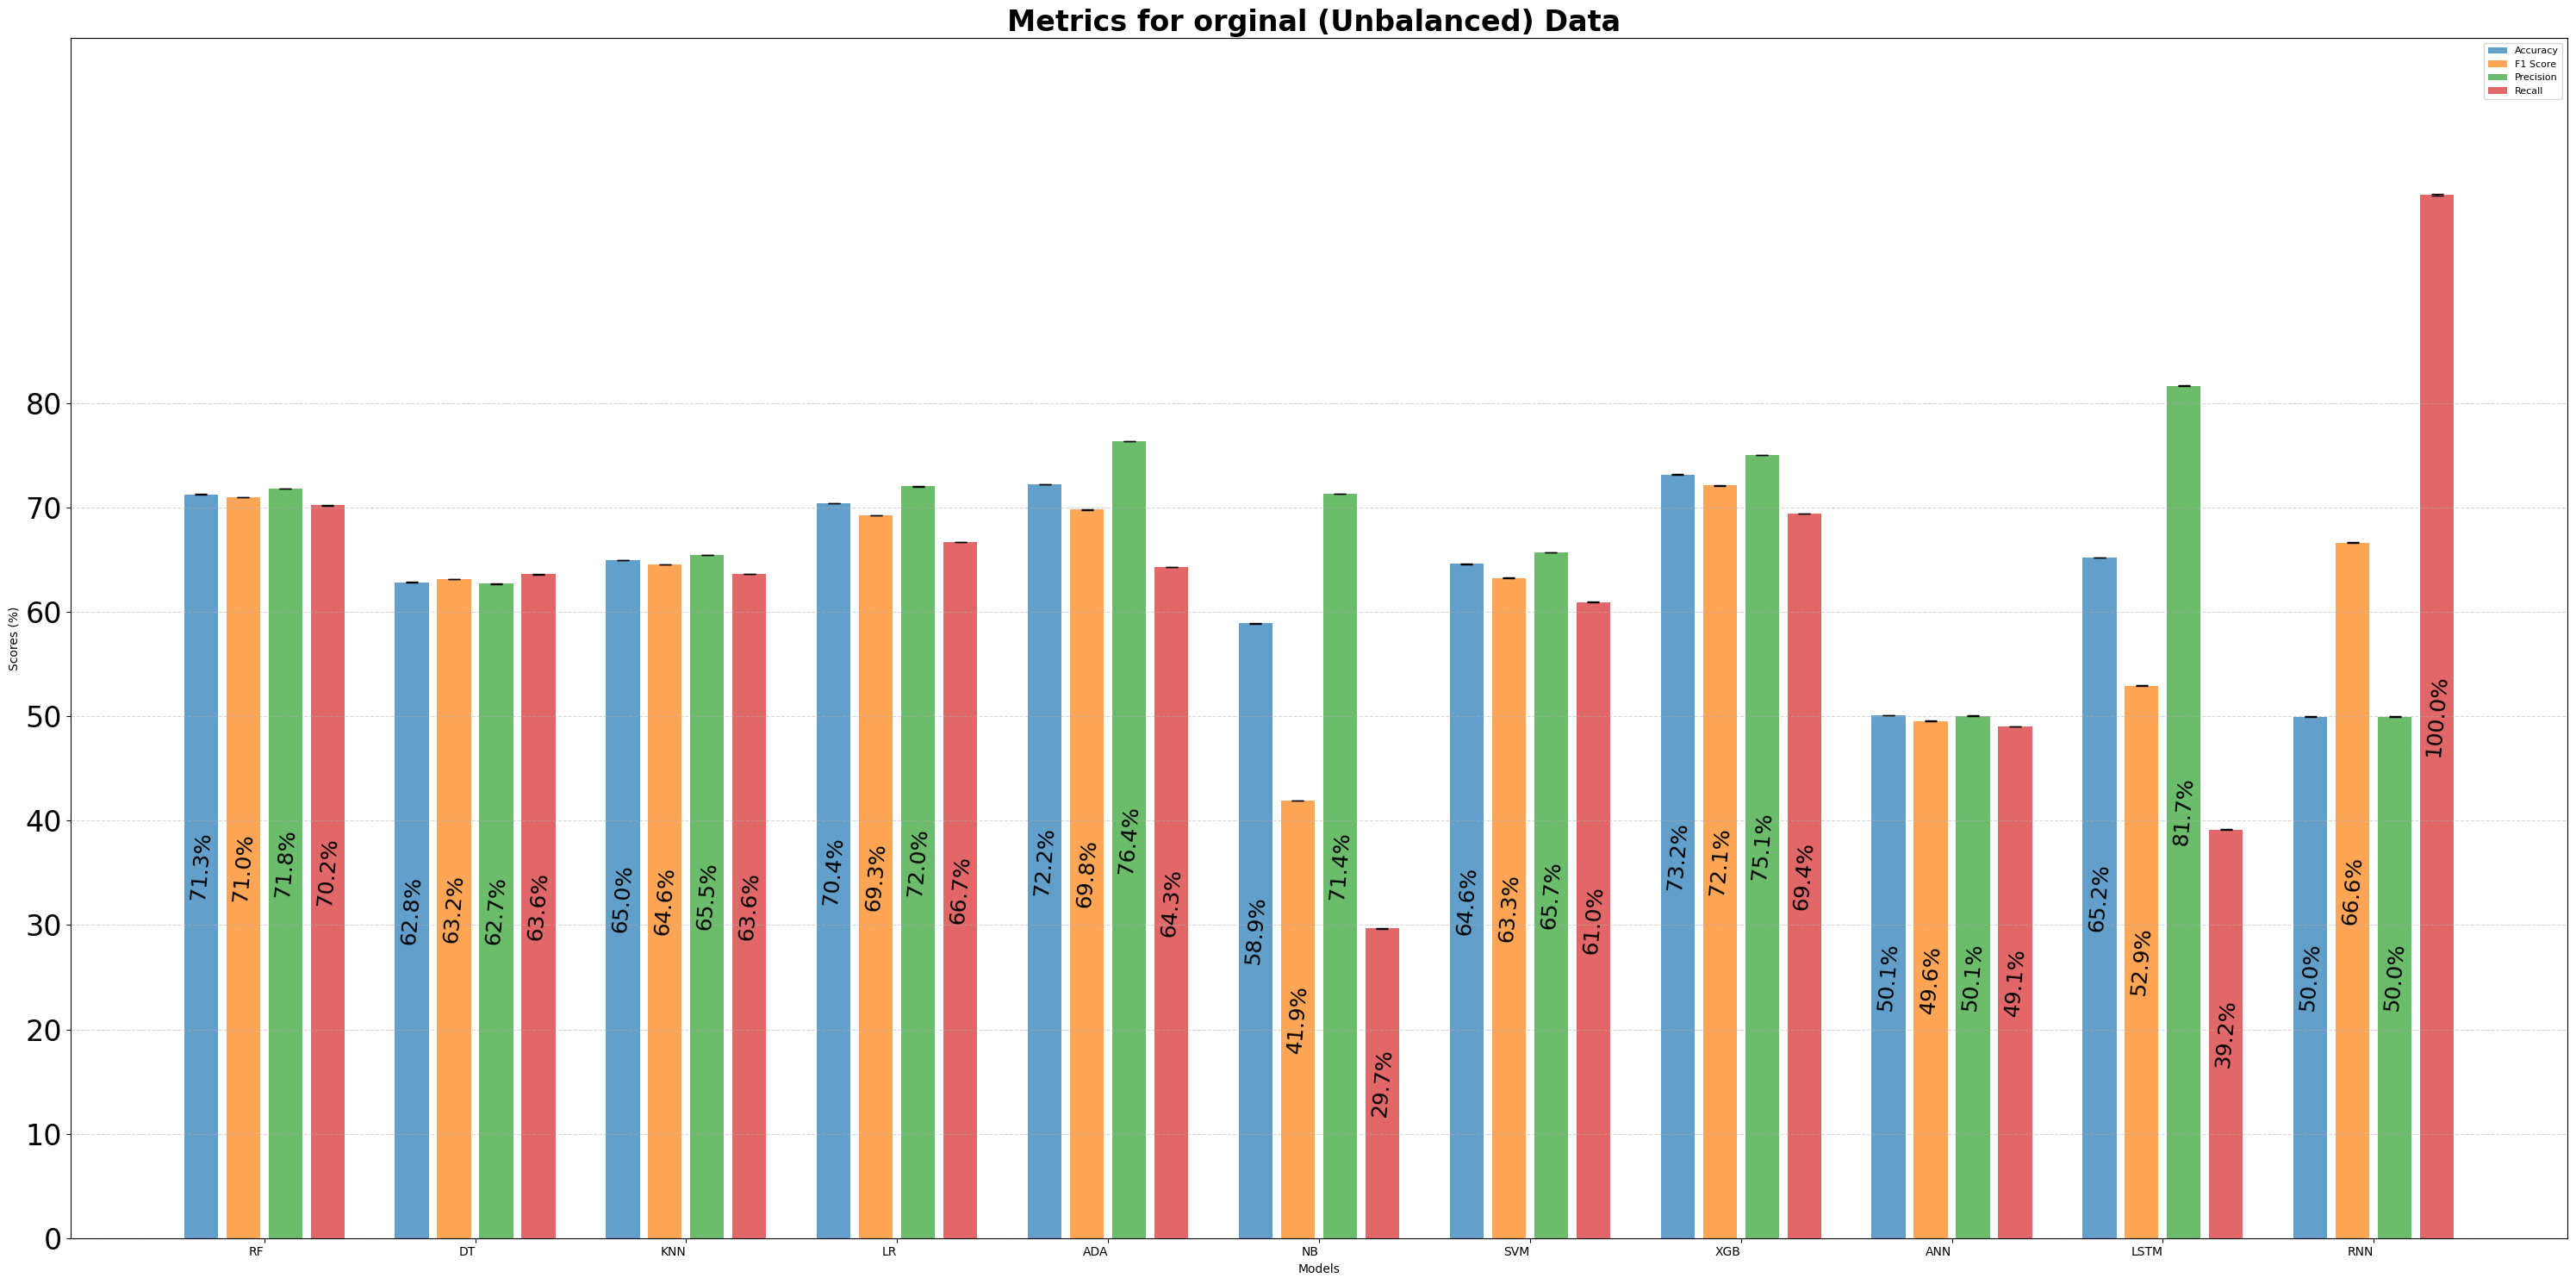

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

# Accuracy, Precision, Recall, F1 Score for each model (updated based on the provided data)
accuracy = [100 * x for x in [
    0.7129285714285715, 0.6284285714285714, 0.6499285714285714,0.7042857142857143, 0.7222857142857143,
     0.5890714285714286, 0.6462142857142857 ,0.7318571428571429, 0.5009285714285714,0.6521428571428571,
    0.4997142857142857

]]
precision = [100 * x for x in [
    0.7183078045222465, 0.6272497187851519, 0.65487894350697, 0.7204384069157147, 0.7638370118845501,
    0.713500515286843, 0.6574687837212887, 0.7505409582689335, 0.5006564551422319, 0.8169350029815146,
    0.4997142857142857
]]
recall = [100 * x for x in [
    0.7022247575584712, 0.6361950941243583, 0.6364803194523674, 0.667095483133219, 0.6430817610062893,
    0.2968839336763865, 0.6096340766152087, 0.6941109205260149, 0.49056603773584906,0.39165237278444825, 1.0
]]
f1_scores_list = [100 * x for x in [
   0.7101752361722073, 0.6316907391673747, 0.6455485644029797, 0.6927415763693039, 0.6982772000620828,
     0.419299485212476, 0.6326485203589706, 0.7212238229615328, 0.49555988737275286,0.5294685990338164,
    0.6664126500285769
]]

# Dummy error values for error bars (calculated or assumed for the sake of this example)
error_accuracies = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]
error_precisions = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.05]
error_recalls = [0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.05]
error_f1_scores = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]

# Metrics and labels
metrics = [accuracy, f1_scores_list, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )

        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for orginal (Unbalanced) Data ', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=10)
ax.set_ylabel('Scores (%)', fontsize=10)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=10)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 90, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for orginal (Unbalanced) Data .pdf', bbox_inches='tight')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


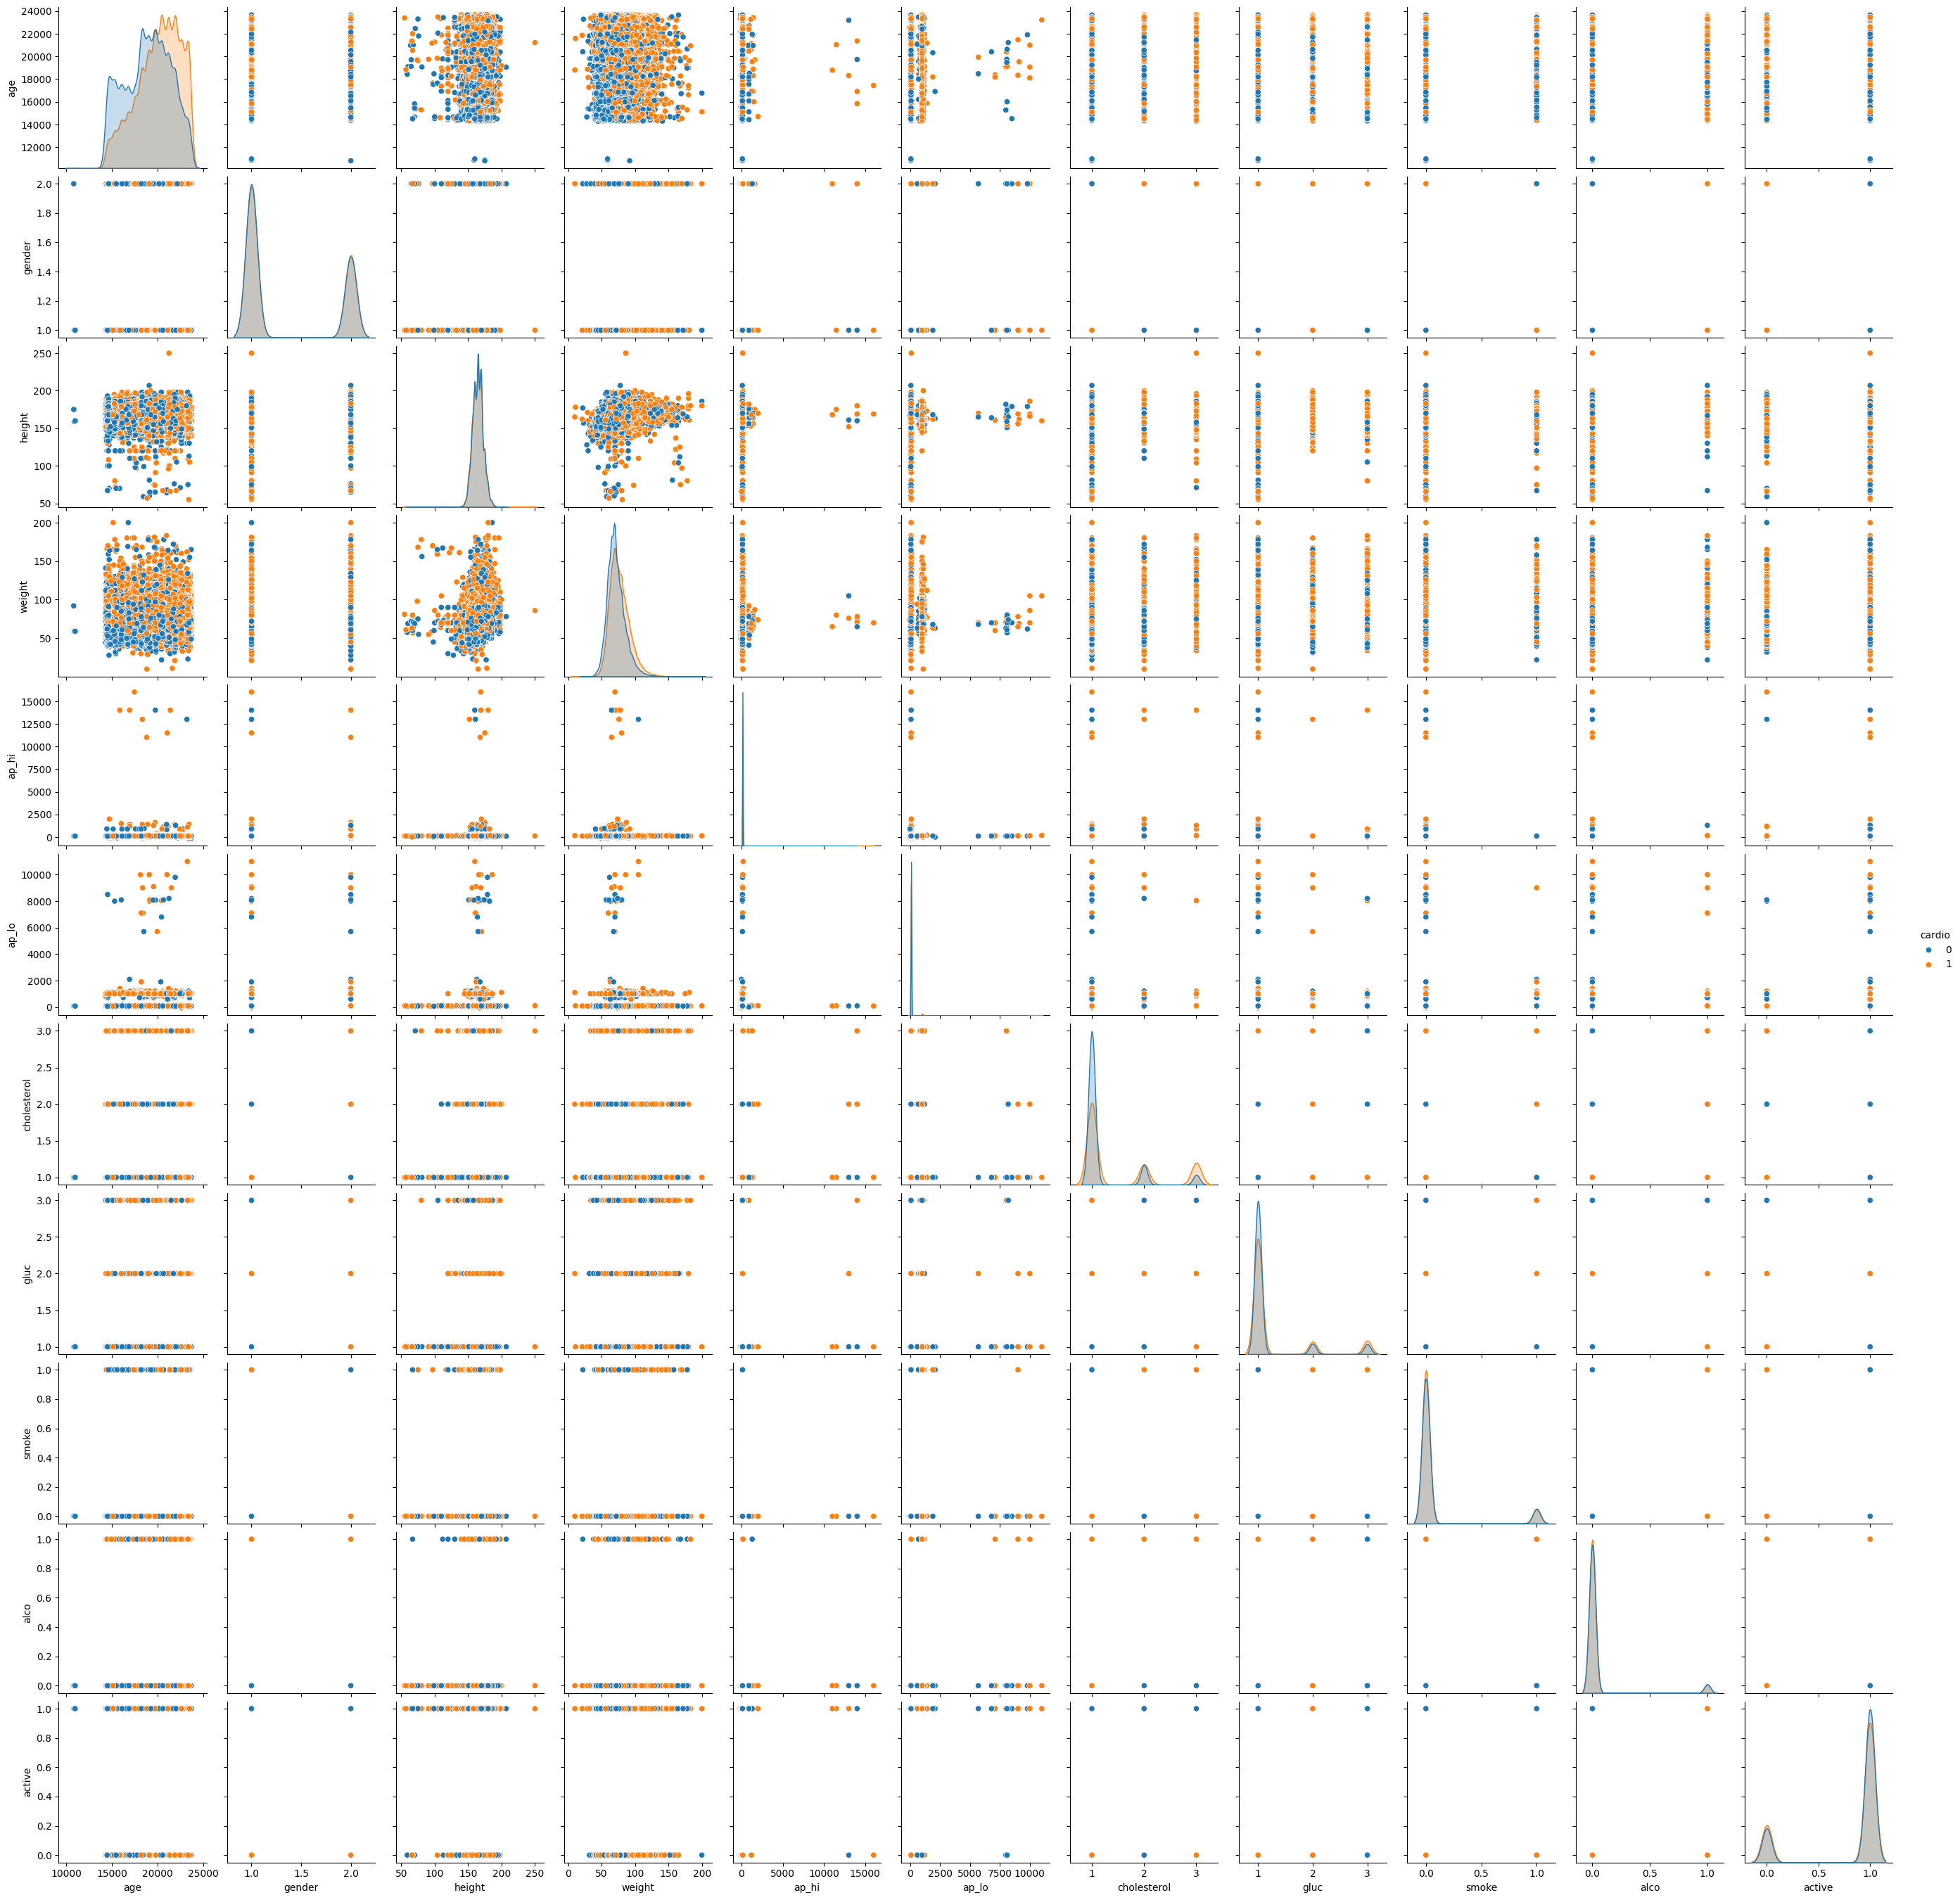

In [56]:
df.info()
sns.pairplot(df, hue = 'cardio')

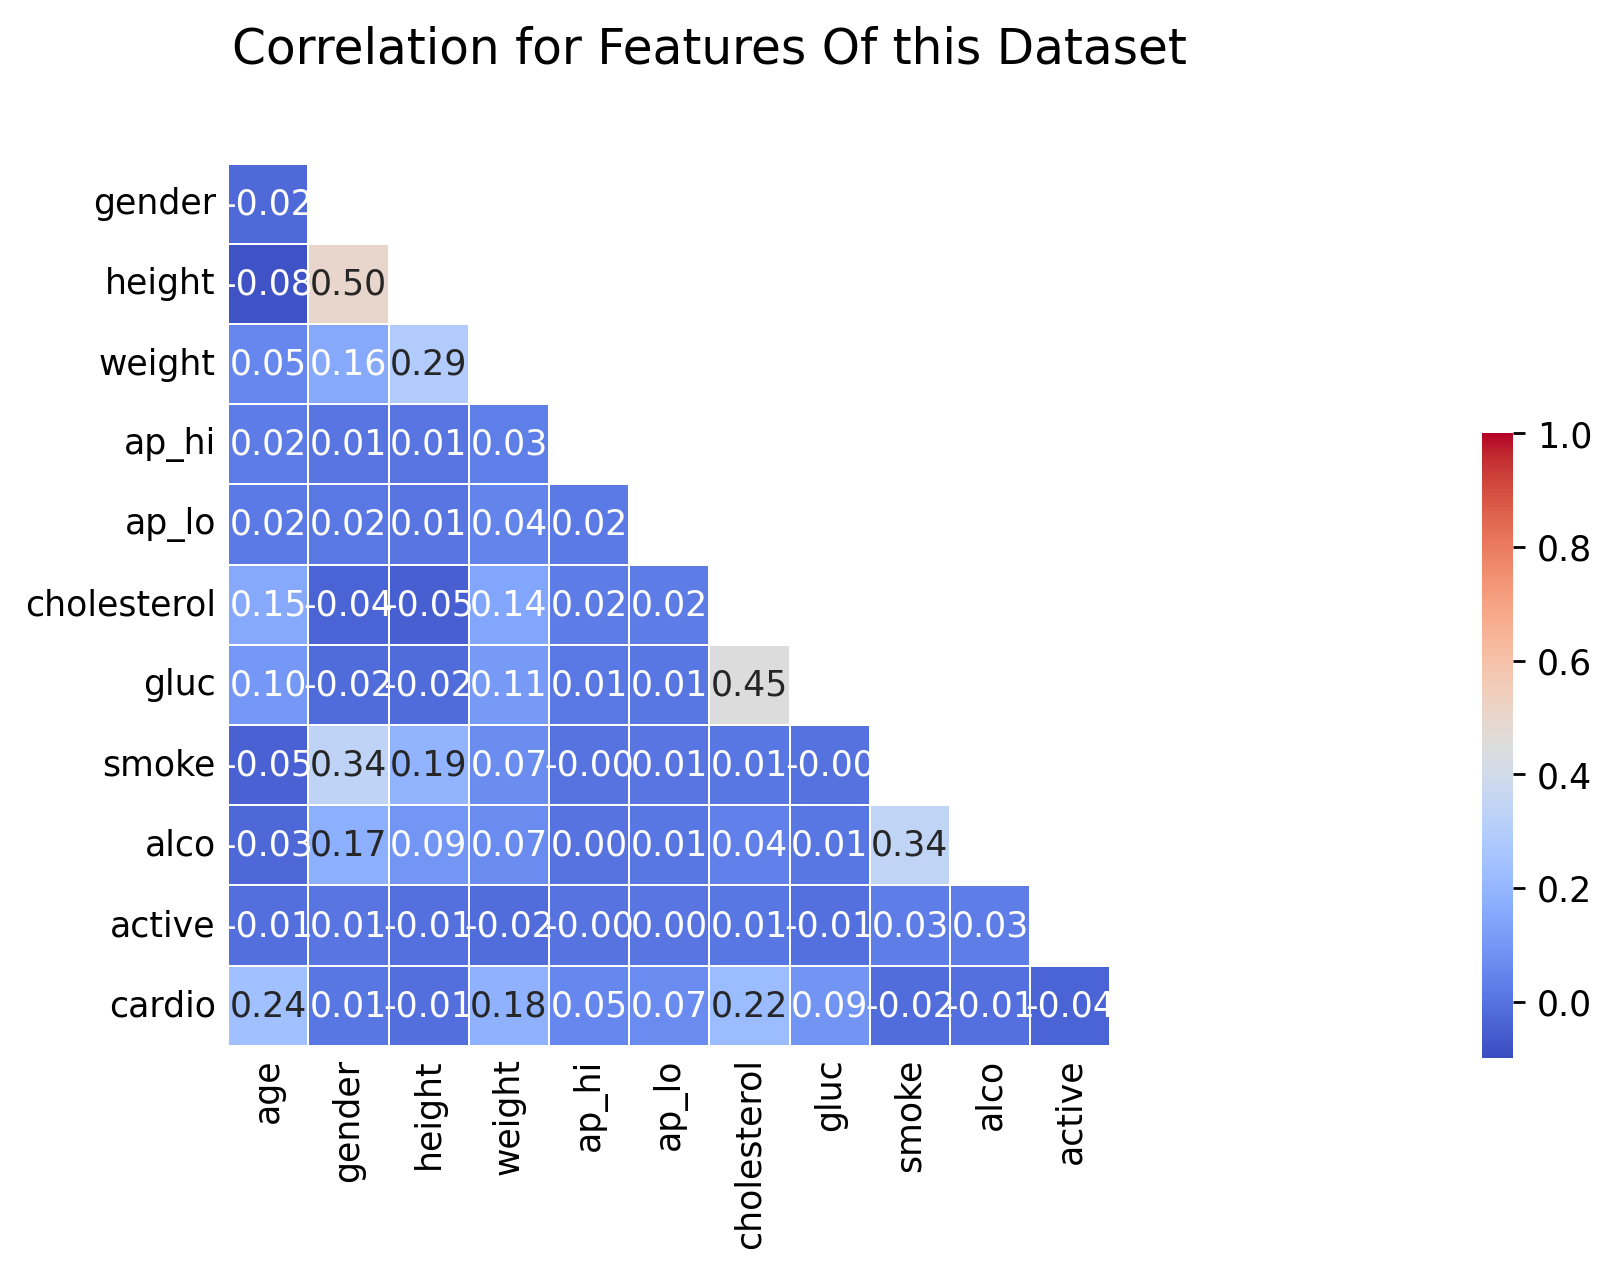

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute the correlation matrix
corr = df.corr(numeric_only=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(7, 5), dpi=250)

# Draw the heatmap with the mask
fig = sns.heatmap(corr, vmin=-0.1, vmax=1.0, mask=mask,
                  annot=True, fmt=".2f", cmap='coolwarm',
                  square=True, linewidths=0.5,
                  cbar_kws={"shrink":0.4,  "pad":0.000001})

# Get the colorbar from the axes
cbar = fig.collections[0].colorbar

cbar.ax.set_position([0.95, 0.1, 0.03, 0.5])
cust_labels = df.columns.tolist()
cust_labels[0] = ''
fig.set_yticklabels(cust_labels)
fig.tick_params(axis='y', which='both', length=0)
cust_labels = df.columns.tolist()
cust_labels[len(cust_labels)-1]= ''
fig.set_xticklabels(cust_labels)
fig.tick_params(axis='x', which='both', length=0)
plt.title("Correlation for Features Of this Dataset", fontsize=14)
plt.savefig("Correlation for Features of this Dataset .pdf", bbox_inches='tight') # save figure
plt.show()

Gain Ratio

In [58]:
X_res = df.drop(columns=['cardio'])
y_res = df['cardio']

In [59]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Split Information==
def split_information(X_res, feature):
    value_counts = X_res[feature].value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Gain Ratio
def gain_ratio(X_res, y_res, feature):
    ig = information_gain(X_res, y_res, feature)
    si = split_information(X_res, feature)
    return ig / (si + 1e-9)

# Compute Gain Ratios for all features
gain_ratios = {feature: gain_ratio(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
gain_ratio_results = pd.DataFrame(gain_ratios.items(), columns=['Feature', 'Gain Ratio'])
gain_ratio_results = gain_ratio_results.sort_values(by="Gain Ratio", ascending=False)

# Display the results
print(gain_ratio_results)

        Feature  Gain Ratio
4         ap_hi    0.059219
5         ap_lo    0.047486
6   cholesterol    0.034366
0           age    0.011166
7          gluc    0.008007
3        weight    0.005059
10       active    0.001284
8         smoke    0.000402
2        height    0.000335
9          alco    0.000128
1        gender    0.000051


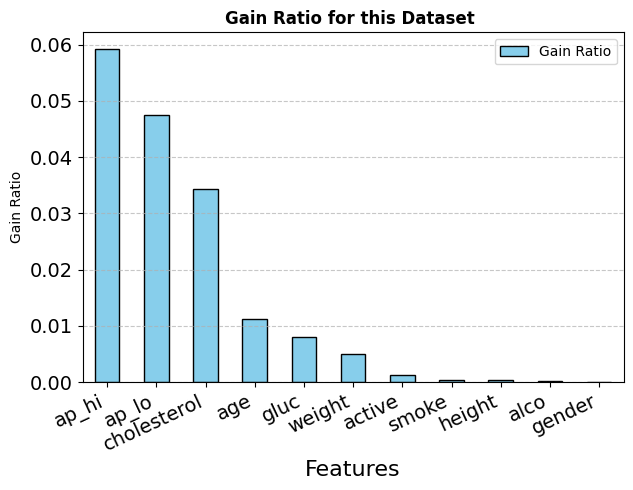

In [60]:
# Plotting the gain ratios
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
gain_ratio_results.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Gain Ratio for this Dataset ', fontsize=12, fontweight='bold')
ax1.set_xlabel('Features', fontsize=16)
ax1.set_ylabel('Gain Ratio', fontsize=10)
ax1.set_xticklabels(gain_ratio_results['Feature'], rotation=25, ha='right', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)  # Correct way to set y-tick label size
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Gain Ratio for this Dataset.pdf") # save figure
plt.show()


Information Gain

In [61]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Information Gains for all features
information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
information_gain_results = pd.DataFrame(information_gains.items(), columns=['Feature', 'Information Gain'])
information_gain_results = information_gain_results.sort_values(by="Information Gain", ascending=False)

# Display the results
print(information_gain_results)

        Feature  Information Gain
4         ap_hi          0.172177
0           age          0.141048
5         ap_lo          0.108562
6   cholesterol          0.036573
3        weight          0.029051
7          gluc          0.006092
2        height          0.001653
10       active          0.000918
8         smoke          0.000173
1        gender          0.000047
9          alco          0.000039


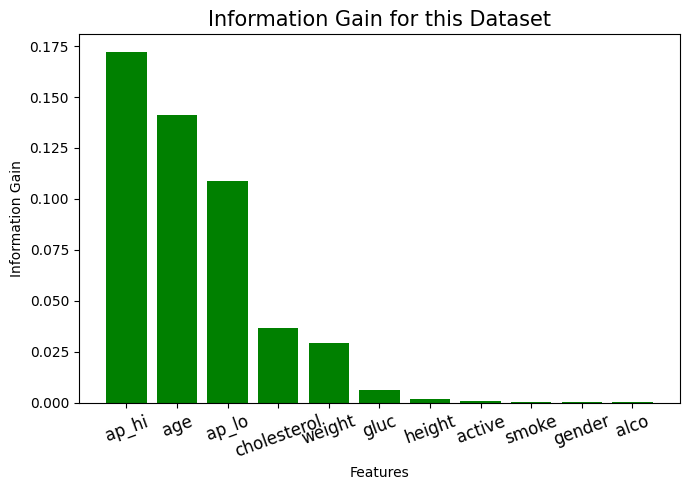

In [62]:
import matplotlib.pyplot as plt

ig_df = information_gain_results.reset_index(drop=True)  # Reset index for clean plotting
ig_df.columns = ['Feature', 'IG']  # Rename columns for convenience

# Plot the Information Gain
plt.figure(figsize=(7, 5))
plt.bar(ig_df['Feature'], ig_df['IG'], color='green')
plt.xlabel('Features', fontsize=10)
plt.xticks(fontsize=12, rotation=20)
plt.ylabel('Information Gain', fontsize=10)
plt.title('Information Gain for this Dataset', fontsize=15)
plt.tight_layout()  # To ensure proper spacing for labels

# Save the plot as a PDF file
plt.savefig("Information Gain for this Dataset.pdf", bbox_inches='tight')

# Display the plot
plt.show()

Pearson Correlation Coefficient

In [63]:
corr_matrix = df.corr(method="pearson")

print("Pearson Correlation Matrix:\n", corr_matrix)


Pearson Correlation Matrix:
                   age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647   
gender      -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719

# Gain Ratio = IG / H(X)

In [64]:
# Assuming you have a loop iterating through features, you can calculate IG and feature_entropy like this:
# for feature in X_res.columns:
#     IG = information_gain(X_res, y_res, feature)
#     feature_entropy = split_information(X_res, feature)

#     GR = IG / feature_entropy if feature_entropy > 0 else 0

#     info_gain.append(IG)
#     gain_ratio.append(GR)

# Example for a single feature:
feature = 'ap_hi' # Replace with the actual feature you want to analyze

IG = information_gain(X_res, y_res, feature)
feature_entropy = split_information(X_res, feature)

GR = IG / feature_entropy if feature_entropy > 0 else 0

print(f"Information Gain for {feature}: {IG}")
print(f"Split Information for {feature}: {feature_entropy}")
print(f"Gain Ratio for {feature}: {GR}")

Information Gain for ap_hi: 0.1721774108734967
Split Information for ap_hi: 2.907461434538929
Gain Ratio for ap_hi: 0.059219155524517196


 Information Gain

In [65]:
X = df.drop(columns=['cardio'])
y = df['cardio']

Encode categorical

In [66]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Initialize lists to store results
info_gain = []
gain_ratio = []

for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

    # Calculate Information Gain
    IG = information_gain(X, y, col)
    info_gain.append(IG)

    # Calculate Split Information
    feature_entropy = split_information(X, col)

    # Calculate Gain Ratio
    GR = IG / feature_entropy if feature_entropy > 0 else 0
    gain_ratio.append(GR)

In [67]:
from sklearn.feature_selection import mutual_info_classif

# Calculate Mutual Information scores
mi_scores = mutual_info_classif(X, y)

# Calculate Pearson correlation with the target variable
pearson_corr = df.corr(numeric_only=False)['cardio'].drop('cardio')
pearson_df = pd.DataFrame({'Feature': pearson_corr.index, 'Pearson_r': pearson_corr.values})

# Combine results
score_df = pd.DataFrame({
    "Feature": X.columns,
    "Pearson_r": pearson_df.set_index("Feature")["Pearson_r"],
    "Mutual_Info": mi_scores,
    "Info_Gain": info_gain,
    "Gain_Ratio": gain_ratio
}).reset_index(drop=True)

score_df.sort_values("Mutual_Info", ascending=False, inplace=True)
score_df.head(10)

,Feature,Pearson_r,Mutual_Info,Info_Gain,Gain_Ratio
4,ap_hi,0.054475,0.121596,0.172177,0.059219
5,ap_lo,0.065719,0.077195,0.108562,0.047486
0,age,0.238159,0.034196,0.141048,0.011166
6,cholesterol,0.221147,0.033025,0.036573,0.034366
3,weight,0.181660,0.015974,0.029051,0.005059
7,gluc,0.089307,0.011191,0.006092,0.008007
10,active,-0.035653,0.008007,0.000918,0.001284
1,gender,0.008109,0.007038,0.000047,0.000051
8,smoke,-0.015486,0.001743,0.000173,0.000402
2,height,-0.010821,0.001676,0.001653,0.000335


In [68]:
# Top features based on Info Gain
selected_features = score_df.head(6)["Feature"].tolist()
print("Selected Features:", selected_features)


Selected Features: ['ap_hi', 'ap_lo', 'age', 'cholesterol', 'weight', 'gluc']


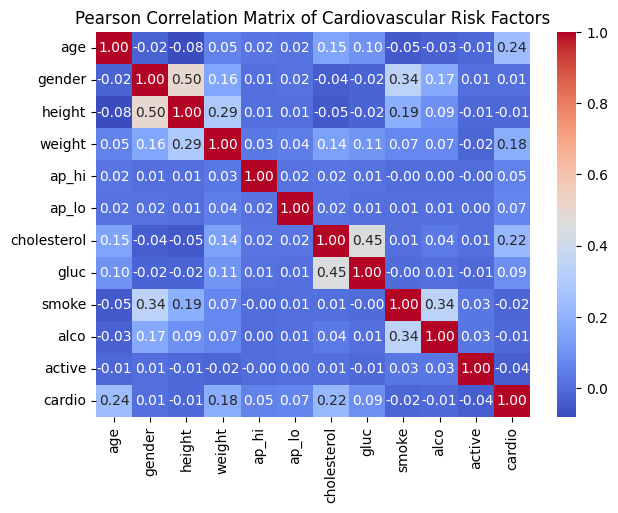

In [69]:
# Heatmap for visualization
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Matrix of Cardiovascular Risk Factors")
plt.show()

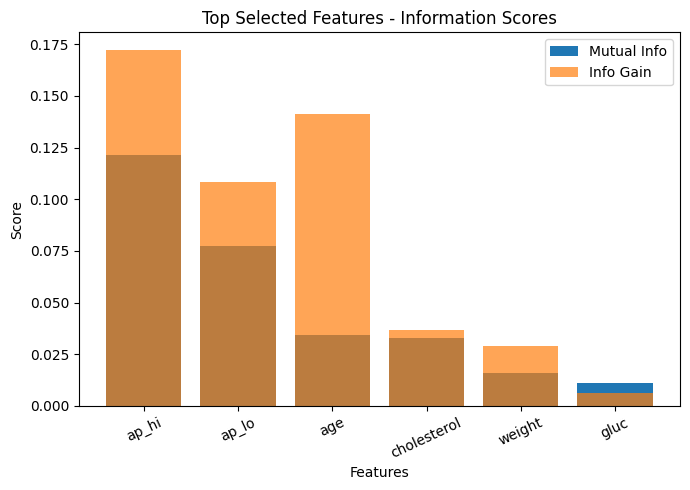

In [70]:
# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(score_df["Feature"][:6], score_df["Mutual_Info"][:6], label="Mutual Info")
plt.bar(score_df["Feature"][:6], score_df["Info_Gain"][:6], alpha=0.7, label="Info Gain")
plt.title("Top Selected Features - Information Scores")
plt.xlabel("Features")
plt.ylabel("Score")
plt.legend()
plt.xticks(rotation=25)
plt.tight_layout()
plt.savefig("cardio_feature_importance_bar.png")
plt.show()

In [7]:
# Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[selected_features + ['cardio']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Selected Features)")
plt.tight_layout()
plt.savefig("cardio_feature_correlation_heatmap.png")
plt.show()

NameError: name 'sns' is not defined

<Figure size 700x500 with 0 Axes>

Hybrid feature selection

In [6]:
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

def rank_to_score(ranks):
    """
    Convert rank-array (1=best) to normalized score (higher=better)
    """
    r = np.array(ranks, dtype=float)
    inv = 1.0 / (r + 1e-9)
    return (inv - inv.min()) / (inv.max() - inv.min() + 1e-9)

# Reload original 2D data for feature selection
X = df.drop(columns=['cardio'])
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 1) Filter: Mutual Information (higher = more relevant)
mi = mutual_info_classif(X_train, y_train, random_state=42)
mi_ranks = np.argsort(np.argsort(-mi)) + 1  # 1 = best

# 2) Filter2: Pearson correlation (absolute) between feature and label
pearson_vals = []
for i in range(X_train.shape[1]):
    fi = X_train.iloc[:, i] # Use iloc for pandas DataFrame
    # compute correlation with y_train (binary)
    corr = np.corrcoef(fi, y_train)[0,1]
    pearson_vals.append(abs(corr))
pearson_vals = np.array(pearson_vals)
pearson_ranks = np.argsort(np.argsort(-pearson_vals)) + 1

# 3) Embedded: RandomForest importance
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_imp = rf.feature_importances_
rf_ranks = np.argsort(np.argsort(-rf_imp)) + 1

# 4) Wrapper: RFE with LogisticRegression (rank_ gives 1 best)
lr = LogisticRegression(max_iter=2000, solver="liblinear")
rfe = RFE(lr, n_features_to_select=max(1, min(3, X_train.shape[1])), step=1)
rfe.fit(X_train, y_train)
rfe_ranks = rfe.ranking_

# Combine: convert ranks to normalized score and average
s_mi = rank_to_score(mi_ranks)
s_pear = rank_to_score(pearson_ranks)
s_rf = rank_to_score(rf_ranks)
s_rfe = rank_to_score(rfe_ranks)

hybrid_score = (s_mi + s_pear + s_rf + s_rfe) / 4.0

# Get feature names
feature_names = X_train.columns

report = pd.DataFrame({
    "feature": feature_names,
    "mutual_info": mi,
    "pearson_abs": pearson_vals,
    "rf_importance": rf_imp,
    "rfe_rank": rfe_ranks,
    "hybrid_score": hybrid_score
}).sort_values("hybrid_score", ascending=False).reset_index(drop=True)

# Create outputs directory if it doesn't exist
import os
if not os.path.exists("/content/outputs"):
    os.makedirs("/content/outputs")

report.to_csv("/content/outputs/hybrid_feature_report.csv", index=False)
print(report)

NameError: name 'df' is not defined

Train ML/DL Models

In [5]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(probability = True),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    performance[name] = [acc, f1]

performance_df = pd.DataFrame(performance, index=["Accuracy", "F1"])
print(performance_df)

performance_df.T.plot(kind="bar", figsize=(8,5))
plt.title("Model Performance (Selected Features)")
plt.ylabel("Score")
plt.show

NameError: name 'X' is not defined

Hyperparameter tuning for top models (RandomizedSearchCV)

In [ ]:
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

def rank_to_score(ranks):
    """
    Convert rank-array (1=best) to normalized score (higher=better)
    """
    r = np.array(ranks, dtype=float)
    inv = 1.0 / (r + 1e-9)
    return (inv - inv.min()) / (inv.max() - inv.min() + 1e-9)

# Check if performance_df is defined
if 'performance_df' not in locals():
    print("Please run the cell with id 'ovLaVHmsdUbI' first to define 'performance_df'.")
else:
    # Choose top N models to tune
    topN = 2
    top_models = performance_df.T.sort_values(by="F1", ascending=False).head(topN).index.tolist()
    print("Tuning top models:", top_models)

    param_spaces = {
        "RandomForest": (RandomForestClassifier(random_state=42, n_jobs=-1),
                         {"n_estimators":[200,300,400,600], "max_depth":[None,5,10,20], "min_samples_split":[2,5,10], "min_samples_leaf":[1,2,4]}),
        "MLP": (MLPClassifier(max_iter=1000, random_state=42),
                {"hidden_layer_sizes":[(64,), (64,32), (128,64)], "alpha":[1e-5,1e-4,1e-3], "learning_rate_init":[1e-4,3e-4,1e-3], "activation":["relu","tanh"]}),
        "SVM": (SVC(probability=True, random_state=42),
                    {"C": np.logspace(-2,2,8), "gamma": np.logspace(-3,0,8), "kernel": ["rbf"]}),
        "LogReg": (LogisticRegression(max_iter=3000),
                   {"C": np.logspace(-3,2,8), "penalty": ["l1","l2"], "solver":["liblinear"]}),
        "KNN": (KNeighborsClassifier(),
                {"n_neighbors": list(range(3,21,2)), "weights":["uniform","distance"], "p":[1,2]})
    }

    tuned_models = {}
    for name in top_models:
        if name not in param_spaces:
            print("No param space for", name, "- skipping")
            continue
        base, space = param_spaces[name]
        rs = RandomizedSearchCV(base, space, n_iter=20, scoring="f1", cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), n_jobs=-1, random_state=42, verbose=1)
        rs.fit(X_train, y_train)
        print(f"Tuned {name}: best params = {rs.best_params_}")
        tuned_models[name] = rs.best_estimator_

    # Evaluate tuned models
    tuned_perf = []
    for name, m in tuned_models.items():
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)
        y_proba = m.predict_proba(X_test)[:,1] if hasattr(m, "predict_proba") else None
        tuned_perf.append({
            "model": name,
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
        })
    tuned_df = pd.DataFrame(tuned_perf).sort_values("f1", ascending=False).reset_index(drop=True)
    tuned_df.to_csv("/content/outputs/model_performance_tuned.csv", index=False)
    print("Before tuning (subset):\n", performance_df.T.loc[top_models][["F1"]])
    print("After tuning:\n", tuned_df[["model","f1"]])

    # Before vs After plot (for models that were tuned)
    common = [m for m in top_models if m in tuned_df["model"].values]
    if common:
        before = performance_df.T.loc[common]["F1"].values
        after = tuned_df.set_index("model").loc[common]["f1"].values
        idx = np.arange(len(common))
        width = 0.35
        plt.figure(figsize=(8,4.5))
        plt.bar(idx - width/2, before, width, label="Before")
        plt.bar(idx + width/2, after, width, label="After")
        plt.xticks(idx, common)
        plt.ylabel("F1")
        plt.title("F1: Before vs After Tuning")
        plt.legend()
        plt.tight_layout()
        plt.savefig("/content/outputs/f1_before_after.png", dpi=150)
        plt.show()

Choose best tuned model and show confusion/ROC

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc

# pick best tuned model by f1 (if any)
if not tuned_df.empty:
    best_name = tuned_df.iloc[0]["model"]
    best_model = tuned_models[best_name]
    print("Best tuned model:", best_name)
    y_pred_best = best_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5,4))
    disp.plot(ax=ax, values_format='d')
    plt.title(f"Confusion Matrix - {best_name} (Tuned)")
    plt.tight_layout(); plt.savefig(f"/content/outputs/confusion_matrix_{best_name}.png", dpi=150)
    plt.show()

    # ROC if probas exist
    if hasattr(best_model, "predict_proba"):
        y_proba_best = best_model.predict_proba(X_test)[:,1]
        fig, ax = plt.subplots(figsize=(5,4))
        RocCurveDisplay.from_predictions(y_test, y_proba_best, ax=ax)
        plt.title(f"ROC Curve - {best_name} (Tuned)")
        plt.tight_layout(); plt.savefig(f"/content/outputs/roc_curve_{best_name}.png", dpi=150)
        plt.show()
else:
    print("No tuned models available (tuning may have been skipped).")

In [ ]:
pip install lime


Explainable AI: SHAP (try) and LIME (try), fallback permutation importance

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import permutation_importance

# Try SHAP (if installed); otherwise fallback to permutation importance
shap_ok = False
try:
    import shap
    shap_ok = True
except Exception as e:
    print("SHAP not installed or failed import:", e)
    shap_ok = False

# Try LIME for instance explanation (optional)
lime_ok = False
try:
    from lime import lime_tabular
    lime_ok = True
except Exception as e:
    print("LIME not installed or failed import:", e)
    lime_ok = False

# check if tuned_df and tuned_models are defined
if 'tuned_df' not in locals() or 'tuned_models' not in locals():
    print("Please run the hyperparameter tuning cell first.")
else:
    # pick best tuned model by f1 (if any)
    if not tuned_df.empty:
        best_name = tuned_df.iloc[0]["model"]
        best_model = tuned_models[best_name]
        print("Best tuned model:", best_name)

        # Permutation importance calculation
        r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
        print(r.importances_mean)


        if shap_ok:
            try:
                # If tree-based, use TreeExplainer; otherwise KernelExplainer (small background)
                if hasattr(best_model, "feature_importances_") or isinstance(best_model, RandomForestClassifier):
                    explainer = shap.TreeExplainer(best_model)
                    shap_values = explainer.shap_values(X_test[selected_features])
                    sv = shap_values[1] if isinstance(shap_values, list) else shap_values
                else:
                    # small background to speed up
                    bg = X_train[selected_features].sample(min(200, X_train[selected_features].shape[0]), random_state=42)
                    explainer = shap.KernelExplainer(best_model.predict_proba, bg)
                    shap_values = explainer.shap_values(X_test[selected_features][:200])
                    sv = shap_values[1] if isinstance(shap_values, list) else shap_values

                # SHAP summary bar
                plt.figure(figsize=(8,4.5))
                shap.summary_plot(sv, X_test[selected_features], feature_names=selected_features, show=False, plot_type="bar")
                plt.tight_layout(); plt.savefig("/content/outputs/shap_summary_bar.png", dpi=150); plt.show()

                # SHAP beeswarm
                plt.figure(figsize=(8,4.5))
                shap.summary_plot(sv, X_test[selected_features], feature_names=selected_features, show=False)
                plt.tight_layout(); plt.savefig("/content/outputs/shap_beeswarm.png", dpi=150); plt.show()
            except Exception as e:
                print("SHAP explanation failed:", e)
                shap_ok = False

        if lime_ok:
            try:
                expl = lime_tabular.LimeTabularExplainer(X_train[selected_features].values, feature_names=selected_features, class_names=["0","1"], discretize_continuous=True, mode="classification")
                exp = expl.explain_instance(X_test[selected_features].iloc[0].values, best_model.predict_proba, num_features=len(selected_features))
                html_path = "/content/outputs/lime_instance0.html"
                exp.save_to_file(html_path)
                print("Saved LIME explanation for instance 0 to:", html_path)
            except Exception as e:
                print("LIME failed:", e)
                lime_ok = False

        # If SHAP/LIME not available, fallback to permutation importance
        if (not shap_ok) and (not lime_ok):
            try:
                perm = permutation_importance(best_model, X_test[selected_features], y_test, n_repeats=10, random_state=42, n_jobs=-1)
                imp_df = pd.DataFrame({"feature": selected_features, "importance_mean": perm.importances_mean, "importance_std": perm.importances_std})
                imp_df = imp_df.sort_values("importance_mean", ascending=False)
                imp_df.to_csv("/content/outputs/permutation_importance.csv", index=False)

                plt.figure(figsize=(8,4.5))
                plt.barh(imp_df["feature"].iloc[::-1], imp_df["importance_mean"].iloc[::-1])
                plt.title("Permutation Importance (fallback)")
                plt.tight_layout(); plt.savefig("/content/outputs/permutation_importance.png", dpi=150)
                plt.show()
            except Exception as e:
                print("Permutation importance failed:", e)

    else:
        print("No tuned models available (tuning may have been skipped).")